# 清理与分析WeRateDogs推特数据
## 收集

In [61]:
# 导入需要的库
import numpy as np
import pandas as pd
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 将CSV文件保存为 dataframe
archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# 下载推特图像的预测数据，将 .tsv文件保存为 dataframe
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/数据清洗/WeRateDogs项目/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
# 将推特的额外附加数据.txt 文件保存为 dataframe
tweet_list = []
file = open('tweet_json.txt')
for line in file.readlines():
    tweet_id = json.loads(line)['id']
    retweet_count = json.loads(line)['retweet_count']
    favorite_count = json.loads(line)['favorite_count']
    tweet_list.append({'tweet_id':tweet_id,
                    'retweet_count':retweet_count,
                    'favorite_count':favorite_count})
tweet = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## 评估
### 目测评估

In [6]:
# 将表中每个单元的内容显示完整
pd.set_option('max_colwidth', 200)

In [7]:
# 目测评估三个数据集
archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [8]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


### 编程评估

In [10]:
archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

In [13]:
all_columns = pd.Series(list(archive_enhanced)+list(tweet)+list(image_predictions))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

In [14]:
archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
archive_enhanced.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
Daisy             7
an                7
Toby              7
Buddy             7
Rusty             6
Stanley           6
Bella             6
Milo              6
Jack              6
Scout             6
Koda              6
Leo               6
Dave              6
Oscar             6
Jax               6
Chester           5
               ... 
Erik              1
Rover             1
Pavlov            1
Dug               1
Shikha            1
Izzy              1
unacceptable      1
Brownie           1
Bruno             1
Derby             1
Chef              1
Smiley            1
Charl             1
Oreo              1
Ralphé            1
Skittle           1
Godi              1
Jackie            1
Mason             1


In [17]:
tweet.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [19]:
sum(image_predictions.jpg_url.duplicated())

66

#### 质量
##### `archive_enhanced` 表格
- 错误的数据类型（timestamp列）
- 大量数据缺失（in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp列）
- rating_denominator列数据不完整，分母有不是10的数据
- rating_numerator列有些行数据提取错误，与text列中的信息不符
- 狗狗名字(name列)数据缺失，且与text列中的信息不符
- 数据集中转发的Twitter信息无效
- 无图片的Twitter信息无效
- tweet_id数据类型错误

##### `image_predictions` 表格
-  jpg_url列有大量重复值

#### 整洁度
- `archive_enhanced`表格中的doggo，floofer，pupper，puppo 列可合并为一个变量
- `archive_enhanced`、`image_predictions`、`tweet`三个表格可以合并



## 清理

In [20]:
# 备份三个数据集
archive_clean = archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_clean = tweet.copy()

#### 1.错误的数据类型(timestamp列)

##### 定义
使用 to_datetime 把timestamp一列的数据类型转换为datetime，并使用.split()字符串分割删除 '+0000'。

##### 代码

In [21]:
# 修改数据类型
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp.str.split('+',expand=True)[0])

##### 测试

In [22]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [23]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

#### 2. 大量数据缺失（in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp列）

##### 定义
用drop( )删除这些列（大量数据缺失，并且对此分析无用，所以删除）

##### 代码

In [24]:
# 解决问题二的代码
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

##### 测试

In [25]:
# 测试问题二是否正确清理完成
archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 3-4. rating_numerator, rating_denominator列有些行数据提取错误，与text列中的信息不符

##### 定义
使用extract( )从`text`原文中重新提取评分rating列，然后再使用split()方法划分为rating_numerator和rating_denominator

##### 代码

In [26]:
archive_clean['rating'] = archive_clean.text.str.extract(r'\D*([\d.]+\/\d+0)',expand=True)

In [27]:
archive_clean['rating'].value_counts()

12/10       558
11/10       463
10/10       462
13/10       351
9/10        157
8/10        102
14/10        56
7/10         53
5/10         35
6/10         32
3/10         19
4/10         15
2/10          9
1/10          8
15/10         2
9.75/10       2
0/10          2
4/20          2
420/10        2
11.26/10      1
13.5/10       1
84/70         1
99/90         1
44/40         1
143/130       1
9.5/10        1
1776/10       1
165/150       1
007/10        1
45/50         1
88/80         1
50/50         1
666/10        1
11.27/10      1
144/120       1
204/170       1
182/10        1
80/80         1
960/00        1
60/50         1
17/10         1
121/110       1
Name: rating, dtype: int64

In [28]:
archive_clean['rating_numerator'] = archive_clean.rating.str.split('/').str[0].astype(float)
archive_clean['rating_denominator'] = archive_clean.rating.str.split('/').str[1].astype(float)

In [29]:
#由于评分中存在分母是10的n倍，且分子可以被n整除的情况，所以评分可能是多个狗狗的图片评分，用向量运算修改为分母为10的模式
archive_clean['rating_numerator'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator'] *10
archive_clean['rating_denominator'] = 10

##### 测试

In [30]:
archive_clean.rating_numerator.value_counts()

12.00      562
11.00      469
10.00      464
13.00      351
9.00       158
8.00       102
14.00       56
7.00        54
5.00        35
6.00        32
3.00        19
4.00        15
2.00        11
1.00         8
0.00         2
9.75         2
420.00       2
15.00        2
1776.00      1
13.50        1
17.00        1
11.27        1
666.00       1
inf          1
9.50         1
11.26        1
182.00       1
Name: rating_numerator, dtype: int64

#### 5. 狗狗名字(name列)数据大量缺失，且与text列中的信息不符

##### 定义
使用正则表达式和extract重新提取狗狗name

##### 代码

In [31]:
archive_clean['name'] = archive_clean.text.str.extract(r'(?:This is|Here is|named|name is|name to|Meet|Say hello to|Here we have)\s([A-Z][^\s.,]*)',expand=True)

In [32]:
archive_clean[archive_clean.name.notnull()].name.count()

1537

In [33]:
archive_clean.name.value_counts()

Charlie    12
Oliver     11
Cooper     11
Lucy       11
Lola       10
Penny      10
Tucker     10
Bo          9
Winston     9
Sadie       8
Daisy       7
Bailey      7
Buddy       7
Toby        7
Koda        6
Bella       6
Oscar       6
Dave        6
Rusty       6
Milo        6
Leo         6
Scout       6
Jack        6
Stanley     6
Jax         6
Gus         5
George      5
Bentley     5
Sammy       5
Alfie       5
           ..
Rover       1
Pavlov      1
Dug         1
Shikha      1
Divine      1
Ester       1
Bobbay      1
Rupert      1
Eazy-E      1
Derby       1
Chef        1
Smiley      1
Bobb        1
Charl       1
Oreo        1
Ralphé      1
Skittle     1
Godi        1
Jackie      1
Bruno       1
Mason       1
Rambo       1
Alfy        1
Crouton     1
Clyde       1
Ron         1
Tycho       1
Filup       1
Dido        1
Andy        1
Name: name, Length: 959, dtype: int64

#### 6. 数据集中转发的Twitter信息无效

##### 定义
使用isnull()函数返回没有转发状态的数据行, 从而删除数据集中转发的Twitter信息

##### 代码

In [34]:
#删除转发的twitter信息
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [35]:
archive_clean = archive_clean.drop('retweeted_status_id',axis=1)

##### 测试

In [36]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2172 non-null float64
rating_denominator    2175 non-null int64
name                  1425 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
rating                2172 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 237.9+ KB


#### 6. 无图片的Twitter信息无效

##### 定义
使用notnull()函数返回由图片的数据行，从而过滤出有图片的Twitter信息

##### 代码

In [37]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

##### 测试

In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2116 non-null float64
rating_denominator    2117 non-null int64
name                  1424 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
rating                2116 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 231.5+ KB


#### 7.  jpg_url列有大量重复值

##### 定义
使用drop_duplicates()函数删除重复值

##### 代码

In [39]:
image_predictions_clean = image_predictions_clean.drop_duplicates()

#### 测试

In [40]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB


#### 整洁度

####  1. `archive_enhanced`表格中的doggo，floofer，pupper，puppo 列可合并为一个变量

##### 定义
提取doggo，floofer，pupper，puppo 列的有效数据，使用melt()函数使其合并为一列分类型变量，再用merge()函数将合并后的列添加到表格中，然后用drop()函数除去多余的列。

##### 代码

In [41]:
stage = archive_clean[(archive_clean.doggo != 'None')|(archive_clean.floofer != 'None')|(archive_clean.pupper != 'None')|(archive_clean.puppo != 'None')]

In [42]:
stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 9 to 2017
Data columns (total 13 columns):
tweet_id              338 non-null int64
timestamp             338 non-null datetime64[ns]
source                338 non-null object
text                  338 non-null object
expanded_urls         338 non-null object
rating_numerator      338 non-null float64
rating_denominator    338 non-null int64
name                  186 non-null object
doggo                 338 non-null object
floofer               338 non-null object
pupper                338 non-null object
puppo                 338 non-null object
rating                338 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 37.0+ KB


In [43]:
df_stage = pd.melt(stage, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name',],
                   value_vars=['doggo','floofer','pupper','puppo'],
                   var_name='stage_name',value_name='stage')

In [44]:
df_stage = df_stage[df_stage.stage != 'None']

In [45]:
df_stage = df_stage.drop('stage_name', axis=1)

In [46]:
archive_clean = archive_clean.merge(df_stage, how='outer')

In [47]:
archive_clean = archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

##### 测试

In [49]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,13/10,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,13/10,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,12/10,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,13/10,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,12/10,NaN


In [50]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2128
Data columns (total 10 columns):
tweet_id              2129 non-null int64
timestamp             2129 non-null datetime64[ns]
source                2129 non-null object
text                  2129 non-null object
expanded_urls         2129 non-null object
rating_numerator      2128 non-null float64
rating_denominator    2129 non-null int64
name                  1429 non-null object
rating                2128 non-null object
stage                 350 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 183.0+ KB


####  2. `archive_enhanced`、`image_predictions`、`tweet`三个表格可以合并

##### 定义
使用merge()函数合并三个数据集

##### 代码

In [114]:
df = archive_clean.merge(image_predictions, how='inner', on='tweet_id').merge(tweet, how='left', on='tweet_id')

#### 测试

In [53]:
#确认融合
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,13/10,NaN,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,13/10,NaN,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,12/10,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,13/10,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,12/10,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 23 columns):
tweet_id              2005 non-null int64
timestamp             2005 non-null datetime64[ns]
source                2005 non-null object
text                  2005 non-null object
expanded_urls         2005 non-null object
rating_numerator      2004 non-null float64
rating_denominator    2005 non-null int64
name                  1387 non-null object
rating                2004 non-null object
stage                 317 non-null object
jpg_url               2005 non-null object
img_num               2005 non-null int64
p1                    2005 non-null object
p1_conf               2005 non-null float64
p1_dog                2005 non-null bool
p2                    2005 non-null object
p2_conf               2005 non-null float64
p2_dog                2005 non-null bool
p3                    2005 non-null object
p3_conf               2005 non-null float64
p3_dog                2005 no

#### 8.  tweet_id 数据类型错误

##### 定义
使用astype()函数修改数据类型

##### 代码

In [90]:
df.tweet_id = df.tweet_id.astype(str)



### 存储清理后的主数据集

In [91]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
df.to_csv('twitter_archive_master.csv', encoding='utf_8', index=False)


## 分析和可视化

**在报告中将探索的问题：**

**Q1:**不同地位的狗狗评分情况；

**Q2:**哪个地位的狗狗最受欢迎？

**Q3:**狗狗评分与点赞数和转发数之间是否有联系？


### Q1: 不同地位的狗狗评分情况

In [115]:
pupper_rating = df.query('stage == "pupper"')['rating_numerator']
doggo_rating = df.query('stage == "doggo"')['rating_numerator']
puppo_rating = df.query('stage == "puppo"')['rating_numerator']
floofer_rating = df.query('stage == "floofer"')['rating_numerator']

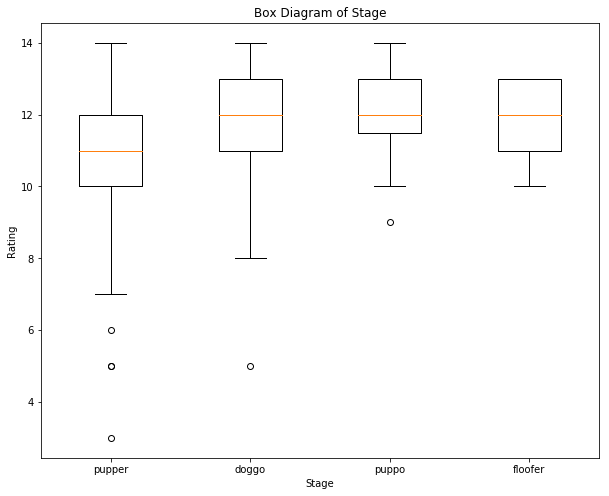

In [127]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
data =[pupper_rating, doggo_rating, puppo_rating, floofer_rating]

labels = ['pupper', 'doggo', 'puppo', 'floofer']
ax.boxplot(data, labels=labels);
plt.title('Box Diagram of Stage')
plt.xlabel('Stage')
plt.ylabel('Rating');

**由箱线图得出，floofer狗狗评分最高，然后依次是puppo, doggo, pupper狗狗。**

### Q2: 哪个地位的狗狗最受欢迎？

In [132]:
#通过点赞数和转发数评估受欢迎情况
retweet = df.groupby('stage').retweet_count.mean()
favorite = df.groupby('stage').favorite_count.mean()
len(retweet)

4

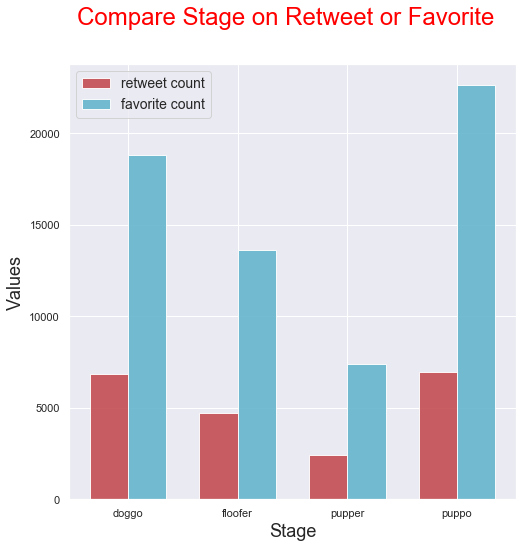

In [135]:
sns.set(context = 'notebook',)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(retweet))

w=0.35
ax.bar(ind, retweet, color = 'r', alpha = 0.9, width = w, label = "retweet count")
ax.bar(ind+w, favorite, color='c', alpha = 0.9, width = w, label = "favorite count")

ax.legend(loc = 'best', fontsize = 14)
ax.set_xticks(ind+w/2)

mean_label = retweet.index
ax.set_xticklabels(mean_label)

ax.set_ylabel('Values', fontsize=18)
ax.set_xlabel('Stage',fontsize=18)
fig.suptitle('Compare Stage on Retweet or Favorite', fontsize=24, color='red');

**由柱状图可得出各个地位狗狗受欢迎程度排名为：puppo > doggo > floofer > pupper, 其中*puppo*地位的狗狗最受欢迎。**

### Q3: 狗狗评分与受欢迎程度(点赞数和转发数)之间是否有联系？

In [160]:
favorite_rating = df[['retweet_count', 'favorite_count', 'rating_numerator']]

In [161]:
# 按评分大小对提取的数组排序
favorite_rating = favorite_rating.sort_values(by='rating_numerator', ascending=False)[10:]
favorite_rating.head(10)


,retweet_count,favorite_count,rating_numerator
277,1540,10437,14.0
164,7530,21318,14.0
280,2540,13819,14.0
326,646,3696,14.0
49,16564,50326,14.0
255,2657,12339,14.0
810,15029,37704,14.0
795,4363,7886,14.0
320,5031,13026,14.0
154,8245,33792,14.0


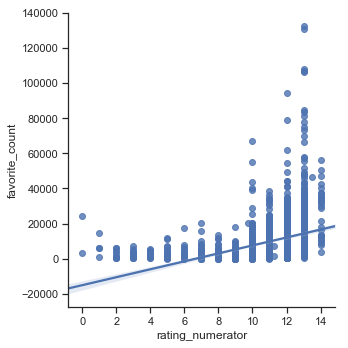

In [163]:
# 用lmplot方法可视化对两个变量绘制散点图
sns.lmplot('rating_numerator','favorite_count',data=favorite_rating)

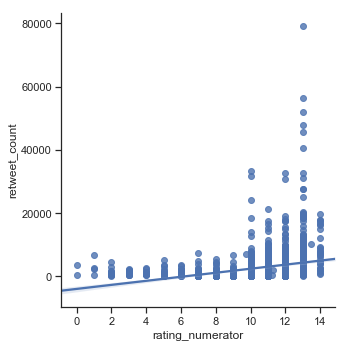

In [164]:
sns.lmplot('rating_numerator','retweet_count',data=favorite_rating)

**由散点图得出，点赞数与转发数与评分均呈正相关。也就是说，狗狗评分越高，被人们看到的机会越大，从而转发数和点赞数都会增加，就会有更多的人喜欢这些狗狗。**


## 总结

**WeRateDogs推特账号对人们发送的狗狗照片进行评分和评级，将可爱的动物与幽默的评论结合起来，从而受到大量Twitter用户和媒体的关注。**

**通过分析发现，不同地位的狗狗们的评分存在差异，floofer狗狗评分最高，然后依次是puppo, doggo, pupper狗狗。**

**继续分析转发数和点赞数与狗狗不同地位之间的联系，得出puppo地位的狗狗最受欢迎。WeRateDogs给出的评分越高，狗狗越容易受欢迎。**

